In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

# Make plots bigger and nicer
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## 1. Understanding maxDets (Maximum Detections)

**maxDets** limits how many detections we consider per image. Default: `[1, 10, 100]`

In [2]:
# Simulated detector output: 15 detections with confidence scores
detections = [
    {'id': 1, 'score': 0.95, 'correct': True},
    {'id': 2, 'score': 0.92, 'correct': True},
    {'id': 3, 'score': 0.88, 'correct': True},
    {'id': 4, 'score': 0.85, 'correct': False},  # False positive
    {'id': 5, 'score': 0.82, 'correct': True},
    {'id': 6, 'score': 0.78, 'correct': True},
    {'id': 7, 'score': 0.75, 'correct': False},  # False positive
    {'id': 8, 'score': 0.70, 'correct': True},
    {'id': 9, 'score': 0.65, 'correct': True},
    {'id': 10, 'score': 0.60, 'correct': True},
    {'id': 11, 'score': 0.55, 'correct': False}, # False positive
    {'id': 12, 'score': 0.50, 'correct': True},
    {'id': 13, 'score': 0.45, 'correct': False}, # False positive
    {'id': 14, 'score': 0.40, 'correct': False}, # False positive
    {'id': 15, 'score': 0.35, 'correct': True},
]

ground_truth_count = 12  # Total objects in the image

print(f"Total detections: {len(detections)}")
print(f"Ground truth objects: {ground_truth_count}")
print(f"\nDetections sorted by confidence:")
print(f"{'ID':<5} {'Score':<8} {'Correct?'}")
print("-" * 25)
for d in detections:
    status = "✓ TP" if d['correct'] else "✗ FP"
    print(f"{d['id']:<5} {d['score']:<8.2f} {status}")

Total detections: 15
Ground truth objects: 12

Detections sorted by confidence:
ID    Score    Correct?
-------------------------
1     0.95     ✓ TP
2     0.92     ✓ TP
3     0.88     ✓ TP
4     0.85     ✗ FP
5     0.82     ✓ TP
6     0.78     ✓ TP
7     0.75     ✗ FP
8     0.70     ✓ TP
9     0.65     ✓ TP
10    0.60     ✓ TP
11    0.55     ✗ FP
12    0.50     ✓ TP
13    0.45     ✗ FP
14    0.40     ✗ FP
15    0.35     ✓ TP


In [3]:
# Apply maxDets constraint
maxDets_values = [1, 10, 100]

print("\n" + "="*60)
print("Effect of maxDets on what detections are considered:")
print("="*60)

for maxDets in maxDets_values:
    # Keep only top maxDets detections
    kept_detections = detections[:min(maxDets, len(detections))]
    
    true_positives = sum(1 for d in kept_detections if d['correct'])
    false_positives = sum(1 for d in kept_detections if not d['correct'])
    
    precision = true_positives / len(kept_detections) if kept_detections else 0
    recall = true_positives / ground_truth_count
    
    print(f"\nmaxDets = {maxDets}:")
    print(f"  Kept: {len(kept_detections)} detections (top {maxDets})")
    print(f"  True Positives: {true_positives}")
    print(f"  False Positives: {false_positives}")
    print(f"  Precision: {precision:.3f} (TP / All Predictions)")
    print(f"  Recall: {recall:.3f} (TP / All Ground Truth)")
    print(f"  Max possible recall: {min(maxDets, ground_truth_count)/ground_truth_count:.3f}")


Effect of maxDets on what detections are considered:

maxDets = 1:
  Kept: 1 detections (top 1)
  True Positives: 1
  False Positives: 0
  Precision: 1.000 (TP / All Predictions)
  Recall: 0.083 (TP / All Ground Truth)
  Max possible recall: 0.083

maxDets = 10:
  Kept: 10 detections (top 10)
  True Positives: 8
  False Positives: 2
  Precision: 0.800 (TP / All Predictions)
  Recall: 0.667 (TP / All Ground Truth)
  Max possible recall: 0.833

maxDets = 100:
  Kept: 15 detections (top 100)
  True Positives: 10
  False Positives: 5
  Precision: 0.667 (TP / All Predictions)
  Recall: 0.833 (TP / All Ground Truth)
  Max possible recall: 1.000


## 2. Understanding Recall

**Recall = True Positives / Total Ground Truth Objects**

"Did I find all the objects?"

In [4]:
# Example scenarios
scenarios = [
    {
        'name': 'Perfect Detector',
        'ground_truth': 10,
        'true_positives': 10,
        'false_positives': 0
    },
    {
        'name': 'Good Detector',
        'ground_truth': 10,
        'true_positives': 8,
        'false_positives': 2
    },
    {
        'name': 'Conservative Detector',
        'ground_truth': 10,
        'true_positives': 5,
        'false_positives': 0
    },
    {
        'name': 'Aggressive Detector',
        'ground_truth': 10,
        'true_positives': 9,
        'false_positives': 20
    },
    {
        'name': 'Limited by maxDets',
        'ground_truth': 150,  # Many objects!
        'true_positives': 100, # But maxDets=100
        'false_positives': 0
    }
]

print("\n" + "="*80)
print("Recall in Different Scenarios")
print("="*80)
print(f"{'Scenario':<25} {'GT':<6} {'TP':<6} {'FP':<6} {'Precision':<12} {'Recall':<10}")
print("-" * 80)

for scenario in scenarios:
    gt = scenario['ground_truth']
    tp = scenario['true_positives']
    fp = scenario['false_positives']
    
    recall = tp / gt
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    print(f"{scenario['name']:<25} {gt:<6} {tp:<6} {fp:<6} {precision:<12.3f} {recall:<10.3f}")
    
    if recall < 1.0:
        missed = gt - tp
        print(f"  → Missed {missed} objects (recall < 1.0)")
    if precision < 1.0:
        print(f"  → {fp} false alarms (precision < 1.0)")


Recall in Different Scenarios
Scenario                  GT     TP     FP     Precision    Recall    
--------------------------------------------------------------------------------
Perfect Detector          10     10     0      1.000        1.000     
Good Detector             10     8      2      0.800        0.800     
  → Missed 2 objects (recall < 1.0)
  → 2 false alarms (precision < 1.0)
Conservative Detector     10     5      0      1.000        0.500     
  → Missed 5 objects (recall < 1.0)
Aggressive Detector       10     9      20     0.310        0.900     
  → Missed 1 objects (recall < 1.0)
  → 20 false alarms (precision < 1.0)
Limited by maxDets        150    100    0      1.000        0.667     
  → Missed 50 objects (recall < 1.0)


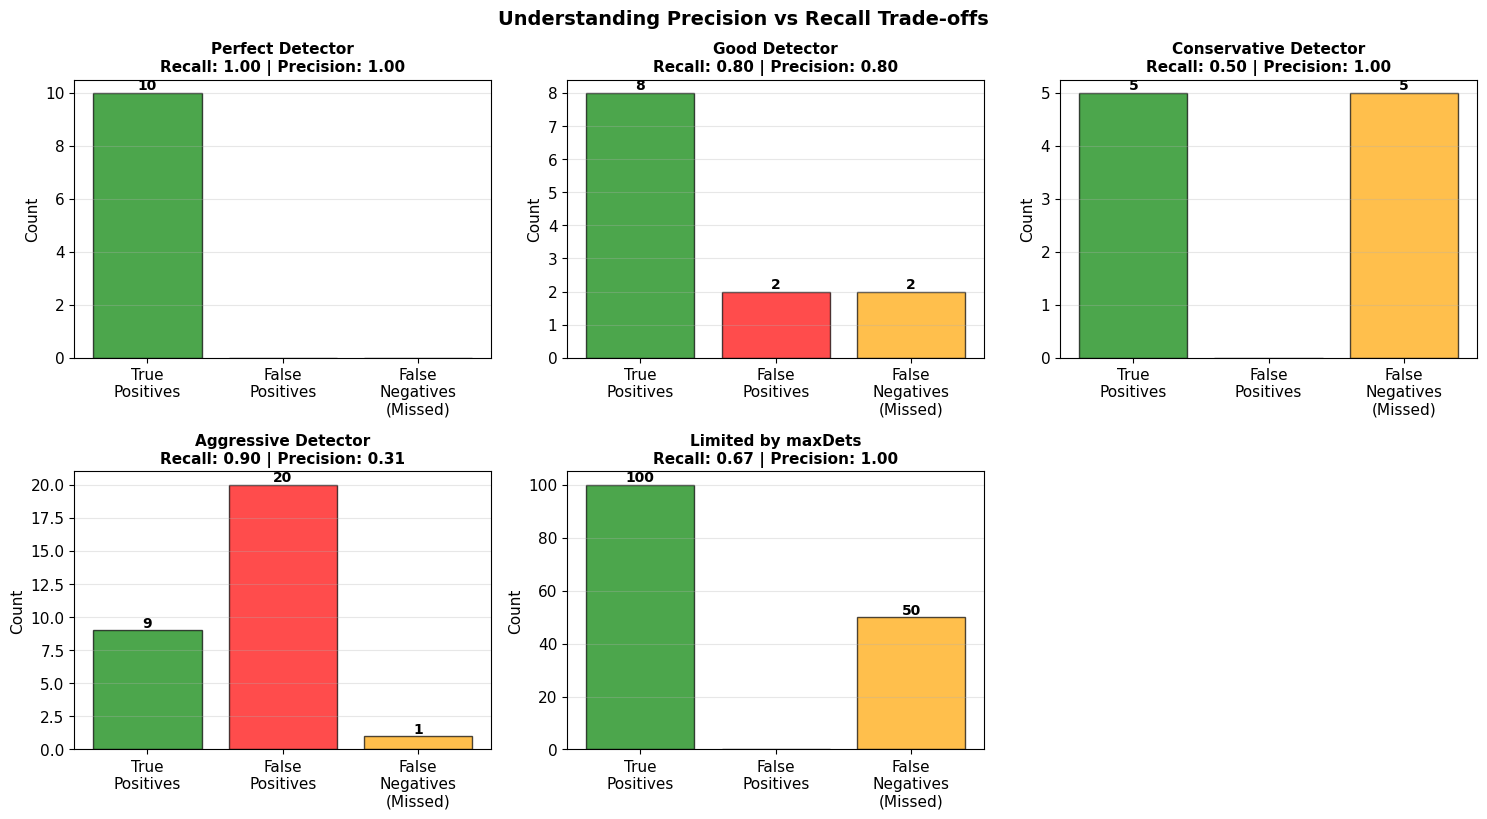

In [5]:
# Visualize the scenarios
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, scenario in enumerate(scenarios):
    ax = axes[idx]
    
    tp = scenario['true_positives']
    fp = scenario['false_positives']
    fn = scenario['ground_truth'] - tp  # False negatives (missed)
    
    recall = tp / scenario['ground_truth']
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Create bar chart
    categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives\n(Missed)']
    values = [tp, fp, fn]
    colors = ['green', 'red', 'orange']
    
    bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
    
    # Add value labels on bars
    for bar, val in zip(bars, values):
        if val > 0:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(val)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_title(f"{scenario['name']}\nRecall: {recall:.2f} | Precision: {precision:.2f}", 
                fontsize=11, fontweight='bold')
    ax.set_ylabel('Count')
    ax.grid(axis='y', alpha=0.3)
    
# Hide the 6th subplot if we have only 5 scenarios
if len(scenarios) < 6:
    axes[5].axis('off')

plt.tight_layout()
plt.suptitle('Understanding Precision vs Recall Trade-offs', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 3. Understanding Precision

**Precision = True Positives / (True Positives + False Positives)**

"Are my detections accurate?"

In [6]:
# Simulate detector at different confidence thresholds
all_detections = [
    (0.95, True),  # (confidence, is_correct)
    (0.90, True),
    (0.85, True),
    (0.80, False),
    (0.75, True),
    (0.70, True),
    (0.65, False),
    (0.60, True),
    (0.55, False),
    (0.50, True),
    (0.45, False),
    (0.40, False),
    (0.35, True),
    (0.30, False),
    (0.25, False),
]

ground_truth = 10

print("\n" + "="*70)
print("Precision and Recall at Different Confidence Thresholds")
print("="*70)
print(f"{'Threshold':<12} {'# Det':<8} {'TP':<6} {'FP':<6} {'Precision':<12} {'Recall':<10}")
print("-" * 70)

thresholds = [0.9, 0.7, 0.5, 0.3, 0.0]

for threshold in thresholds:
    # Keep only detections above threshold
    kept = [(conf, correct) for conf, correct in all_detections if conf >= threshold]
    
    tp = sum(1 for _, correct in kept if correct)
    fp = sum(1 for _, correct in kept if not correct)
    
    precision = tp / len(kept) if kept else 0
    recall = tp / ground_truth
    
    print(f"{threshold:<12.1f} {len(kept):<8} {tp:<6} {fp:<6} {precision:<12.3f} {recall:<10.3f}")

print("\nKey Insight: As threshold decreases, recall increases but precision may decrease!")


Precision and Recall at Different Confidence Thresholds
Threshold    # Det    TP     FP     Precision    Recall    
----------------------------------------------------------------------
0.9          2        2      0      1.000        0.200     
0.7          6        5      1      0.833        0.500     
0.5          10       7      3      0.700        0.700     
0.3          14       8      6      0.571        0.800     
0.0          15       8      7      0.533        0.800     

Key Insight: As threshold decreases, recall increases but precision may decrease!


## 4. The Precision-Recall Curve

This is the heart of Average Precision!

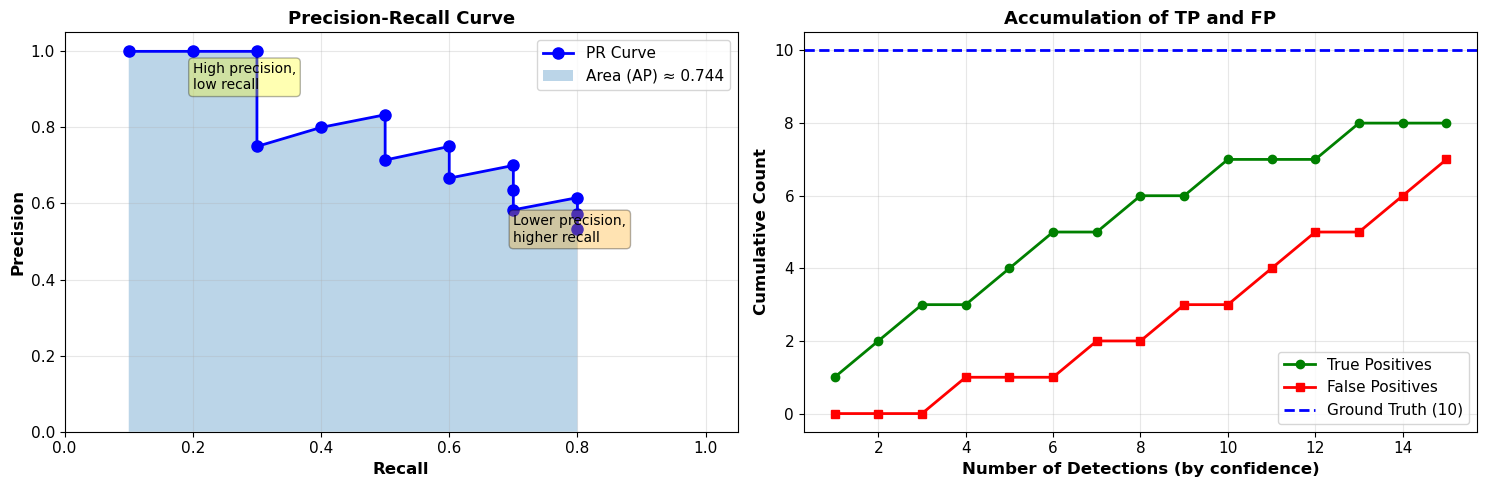


Average Precision (mean of precision values): 0.744
Maximum Recall achieved: 0.800


In [7]:
# Calculate precision and recall at all confidence levels
precisions = []
recalls = []

for i in range(1, len(all_detections) + 1):
    # Take top i detections (sorted by confidence)
    kept = all_detections[:i]
    
    tp = sum(1 for _, correct in kept if correct)
    fp = sum(1 for _, correct in kept if not correct)
    
    precision = tp / len(kept) if kept else 0
    recall = tp / ground_truth
    
    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Precision-Recall curve
ax1.plot(recalls, precisions, 'b-o', linewidth=2, markersize=8, label='PR Curve')
ax1.fill_between(recalls, precisions, alpha=0.3, label=f'Area (AP) ≈ {np.mean(precisions):.3f}')
ax1.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax1.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax1.set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 1.05)

# Add annotations
ax1.annotate('High precision,\nlow recall', xy=(0.2, 0.9), fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax1.annotate('Lower precision,\nhigher recall', xy=(0.7, 0.5), fontsize=10,
            bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))

# Right plot: How detections accumulate
cumulative_tp = []
cumulative_fp = []
tp_count = 0
fp_count = 0

for conf, correct in all_detections:
    if correct:
        tp_count += 1
    else:
        fp_count += 1
    cumulative_tp.append(tp_count)
    cumulative_fp.append(fp_count)

x = range(1, len(all_detections) + 1)
ax2.plot(x, cumulative_tp, 'g-o', linewidth=2, markersize=6, label='True Positives')
ax2.plot(x, cumulative_fp, 'r-s', linewidth=2, markersize=6, label='False Positives')
ax2.axhline(y=ground_truth, color='blue', linestyle='--', linewidth=2, label=f'Ground Truth ({ground_truth})')
ax2.set_xlabel('Number of Detections (by confidence)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Count', fontsize=12, fontweight='bold')
ax2.set_title('Accumulation of TP and FP', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nAverage Precision (mean of precision values): {np.mean(precisions):.3f}")
print(f"Maximum Recall achieved: {max(recalls):.3f}")

## 5. COCO's Average Precision Calculation

COCO samples precision at 101 recall levels (0.00, 0.01, 0.02, ..., 1.00)


COCO Average Precision Calculation
Recall thresholds sampled: 101
Average Precision (AP): 0.6756

This is the 'area under the precision-recall curve'!


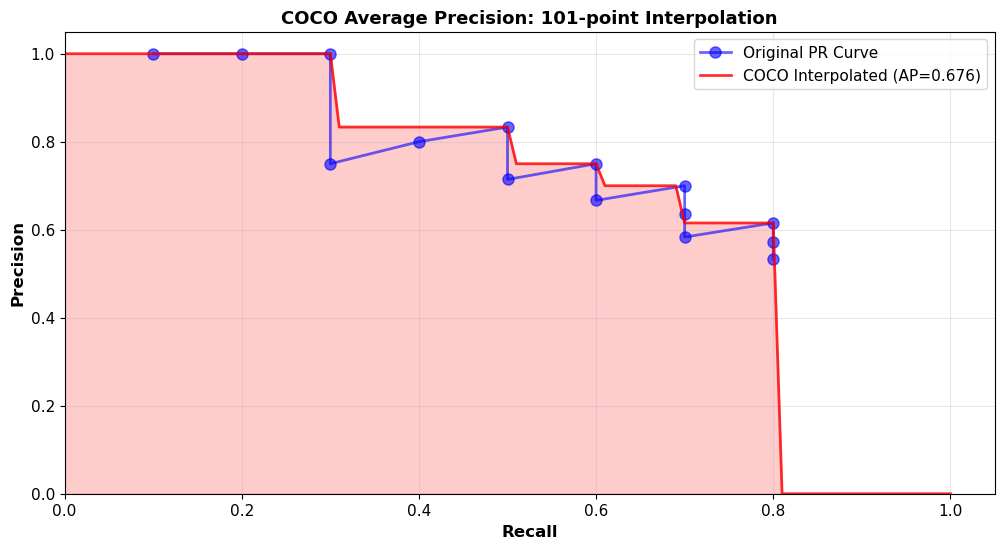

In [8]:
# Simulate COCO's interpolation
recall_thresholds = np.linspace(0.0, 1.0, 101)  # COCO uses 101 points

# Interpolate precision at each recall threshold
interpolated_precisions = []

for r_thresh in recall_thresholds:
    # Find precisions where recall >= r_thresh
    valid_precisions = [p for r, p in zip(recalls, precisions) if r >= r_thresh]
    
    if valid_precisions:
        # COCO uses max precision at this recall level
        interpolated_precisions.append(max(valid_precisions))
    else:
        interpolated_precisions.append(0)

# Calculate Average Precision
average_precision = np.mean(interpolated_precisions)

print(f"\n" + "="*60)
print(f"COCO Average Precision Calculation")
print("="*60)
print(f"Recall thresholds sampled: {len(recall_thresholds)}")
print(f"Average Precision (AP): {average_precision:.4f}")
print(f"\nThis is the 'area under the precision-recall curve'!")

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(recalls, precisions, 'b-o', linewidth=2, markersize=8, label='Original PR Curve', alpha=0.6)
plt.plot(recall_thresholds, interpolated_precisions, 'r-', linewidth=2, 
         label=f'COCO Interpolated (AP={average_precision:.3f})', alpha=0.8)
plt.fill_between(recall_thresholds, interpolated_precisions, alpha=0.2, color='red')
plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('COCO Average Precision: 101-point Interpolation', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.show()

## 6. Why Recall Might NOT Reach 1.0

Let's demonstrate the key scenarios

In [9]:
print("\n" + "="*80)
print("Scenarios Where Recall Cannot Reach 1.0")
print("="*80)

# Scenario 1: maxDets constraint
print("\n1. LIMITED BY maxDets:")
print("-" * 40)
gt_objects = 150
maxDets = 100
perfect_detections = 150  # Detector found all!

actual_recall = min(maxDets, perfect_detections) / gt_objects
print(f"Ground truth objects: {gt_objects}")
print(f"Perfect detector found: {perfect_detections}")
print(f"But maxDets constraint: {maxDets}")
print(f"→ Only {maxDets} detections considered")
print(f"→ Recall = {maxDets}/{gt_objects} = {actual_recall:.3f} ❌")
print(f"   (Cannot reach 1.0 due to maxDets!)")

# Scenario 2: Detector misses objects
print("\n2. DETECTOR MISSES OBJECTS:")
print("-" * 40)
gt_objects = 50
found = 35
missed = gt_objects - found

recall = found / gt_objects
print(f"Ground truth objects: {gt_objects}")
print(f"Detector found: {found}")
print(f"Detector missed: {missed}")
print(f"→ Recall = {found}/{gt_objects} = {recall:.3f} ❌")
print(f"   (Detector not perfect!)")

# Scenario 3: IoU threshold too strict
print("\n3. IoU THRESHOLD TOO STRICT:")
print("-" * 40)
gt_objects = 40
detections_total = 40
iou_above_075 = 30  # Only 30 have IoU > 0.75

recall_at_075 = iou_above_075 / gt_objects
print(f"Ground truth objects: {gt_objects}")
print(f"Detections made: {detections_total}")
print(f"Detections with IoU ≥ 0.75: {iou_above_075}")
print(f"Detections with IoU < 0.75: {detections_total - iou_above_075} (not precise enough)")
print(f"→ Recall @ IoU=0.75 = {iou_above_075}/{gt_objects} = {recall_at_075:.3f} ❌")
print(f"   (Localization not precise enough!)")

# Scenario 4: Area range filtering
print("\n4. AREA RANGE FILTERING:")
print("-" * 40)
total_objects = 100
small_objects = 30  # Only 30 are "small"
small_found = 20

recall_small = small_found / small_objects
print(f"Total objects in image: {total_objects}")
print(f"Small objects (area < 32²): {small_objects}")
print(f"Small objects detected: {small_found}")
print(f"→ Recall for small objects = {small_found}/{small_objects} = {recall_small:.3f} ❌")
print(f"   (Filtered by area range!)")


Scenarios Where Recall Cannot Reach 1.0

1. LIMITED BY maxDets:
----------------------------------------
Ground truth objects: 150
Perfect detector found: 150
But maxDets constraint: 100
→ Only 100 detections considered
→ Recall = 100/150 = 0.667 ❌
   (Cannot reach 1.0 due to maxDets!)

2. DETECTOR MISSES OBJECTS:
----------------------------------------
Ground truth objects: 50
Detector found: 35
Detector missed: 15
→ Recall = 35/50 = 0.700 ❌
   (Detector not perfect!)

3. IoU THRESHOLD TOO STRICT:
----------------------------------------
Ground truth objects: 40
Detections made: 40
Detections with IoU ≥ 0.75: 30
Detections with IoU < 0.75: 10 (not precise enough)
→ Recall @ IoU=0.75 = 30/40 = 0.750 ❌
   (Localization not precise enough!)

4. AREA RANGE FILTERING:
----------------------------------------
Total objects in image: 100
Small objects (area < 32²): 30
Small objects detected: 20
→ Recall for small objects = 20/30 = 0.667 ❌
   (Filtered by area range!)


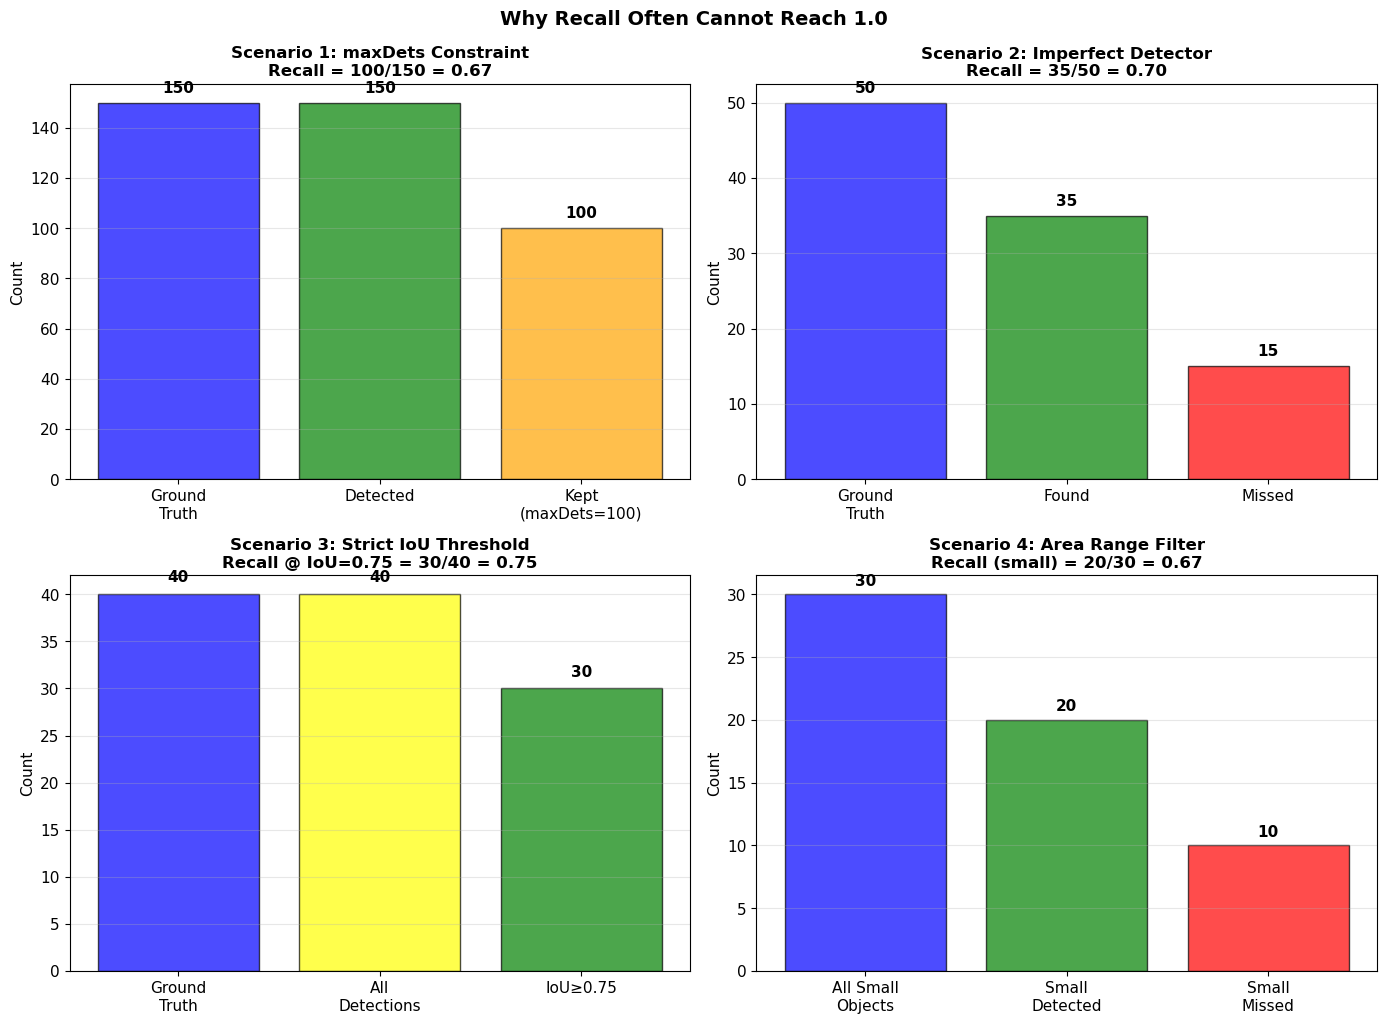

In [10]:
# Visualize these scenarios
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scenario 1: maxDets
ax = axes[0, 0]
categories = ['Ground\nTruth', 'Detected', 'Kept\n(maxDets=100)']
values = [150, 150, 100]
colors = ['blue', 'green', 'orange']
bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 3,
           f'{val}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_title('Scenario 1: maxDets Constraint\nRecall = 100/150 = 0.67', 
            fontsize=12, fontweight='bold')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.3)

# Scenario 2: Detector misses objects
ax = axes[0, 1]
categories = ['Ground\nTruth', 'Found', 'Missed']
values = [50, 35, 15]
colors = ['blue', 'green', 'red']
bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
           f'{val}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_title('Scenario 2: Imperfect Detector\nRecall = 35/50 = 0.70', 
            fontsize=12, fontweight='bold')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.3)

# Scenario 3: IoU threshold
ax = axes[1, 0]
categories = ['Ground\nTruth', 'All\nDetections', 'IoU≥0.75']
values = [40, 40, 30]
colors = ['blue', 'yellow', 'green']
bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
           f'{val}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_title('Scenario 3: Strict IoU Threshold\nRecall @ IoU=0.75 = 30/40 = 0.75', 
            fontsize=12, fontweight='bold')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.3)

# Scenario 4: Area filtering
ax = axes[1, 1]
categories = ['All Small\nObjects', 'Small\nDetected', 'Small\nMissed']
values = [30, 20, 10]
colors = ['blue', 'green', 'red']
bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
           f'{val}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_title('Scenario 4: Area Range Filter\nRecall (small) = 20/30 = 0.67', 
            fontsize=12, fontweight='bold')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Why Recall Often Cannot Reach 1.0', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 7. Complete COCO Metrics Summary

Putting it all together!

In [11]:
print("\n" + "="*80)
print("COCO EVALUATION METRICS SUMMARY")
print("="*80)

print("\n📊 KEY METRICS:")
print("-" * 80)
print("1. Average Precision (AP):")
print("   - Area under Precision-Recall curve")
print("   - Averages precision at 101 recall levels (0.00 to 1.00)")
print("   - Combines precision AND recall into single metric")
print("   - Range: 0 to 1 (higher is better)")

print("\n2. Average Recall (AR):")
print("   - Maximum recall given detection limit")
print("   - Reported at maxDets = [1, 10, 100]")
print("   - Shows coverage of ground truth objects")
print("   - Range: 0 to 1 (higher is better)")

print("\n🎯 STANDARD COCO METRICS (12 total):")
print("-" * 80)
metrics_table = [
    ("AP", "IoU=0.50:0.95", "all", 100),
    ("AP", "IoU=0.50", "all", 100),
    ("AP", "IoU=0.75", "all", 100),
    ("AP", "IoU=0.50:0.95", "small", 100),
    ("AP", "IoU=0.50:0.95", "medium", 100),
    ("AP", "IoU=0.50:0.95", "large", 100),
    ("AR", "IoU=0.50:0.95", "all", 1),
    ("AR", "IoU=0.50:0.95", "all", 10),
    ("AR", "IoU=0.50:0.95", "all", 100),
    ("AR", "IoU=0.50:0.95", "small", 100),
    ("AR", "IoU=0.50:0.95", "medium", 100),
    ("AR", "IoU=0.50:0.95", "large", 100),
]

print(f"{'Metric':<6} {'IoU':<15} {'Area':<8} {'maxDets':<8} {'Description'}")
print("-" * 80)
for metric, iou, area, maxdets in metrics_table:
    if metric == "AP":
        desc = f"Precision quality"
    else:
        desc = f"Coverage limit"
    print(f"{metric:<6} {iou:<15} {area:<8} {maxdets:<8} {desc}")

print("\n💡 KEY INSIGHTS:")
print("-" * 80)
print("✓ maxDets limits how many detections per image are considered")
print("✓ Precision = accuracy of predictions (TP / all predictions)")
print("✓ Recall = coverage of ground truth (TP / all ground truth)")
print("✓ AP combines both via the precision-recall curve")
print("✓ Recall may not reach 1.0 due to:")
print("   - maxDets constraint (e.g., 100 detections max)")
print("   - Imperfect detector (misses objects)")
print("   - Strict IoU thresholds (imprecise localization)")
print("   - Area/category filtering")
print("\n" + "="*80)


COCO EVALUATION METRICS SUMMARY

📊 KEY METRICS:
--------------------------------------------------------------------------------
1. Average Precision (AP):
   - Area under Precision-Recall curve
   - Averages precision at 101 recall levels (0.00 to 1.00)
   - Combines precision AND recall into single metric
   - Range: 0 to 1 (higher is better)

2. Average Recall (AR):
   - Maximum recall given detection limit
   - Reported at maxDets = [1, 10, 100]
   - Shows coverage of ground truth objects
   - Range: 0 to 1 (higher is better)

🎯 STANDARD COCO METRICS (12 total):
--------------------------------------------------------------------------------
Metric IoU             Area     maxDets  Description
--------------------------------------------------------------------------------
AP     IoU=0.50:0.95   all      100      Precision quality
AP     IoU=0.50        all      100      Precision quality
AP     IoU=0.75        all      100      Precision quality
AP     IoU=0.50:0.95   small    10

## 🎓 Summary

**Key Takeaways:**

1. **maxDets** = Maximum detections per image (default: 1, 10, 100)
   - Prevents computational overload
   - Limits maximum achievable recall

2. **Precision** = "Are my detections correct?"
   - High = few false alarms
   - Formula: TP / (TP + FP)

3. **Recall** = "Did I find all objects?"
   - High = few missed objects
   - Formula: TP / (TP + FN)

4. **Average Precision (AP)** = Area under PR curve
   - Combines precision AND recall
   - Primary metric for detector quality

5. **Recall rarely reaches 1.0** because:
   - maxDets limits detections
   - Detectors miss objects
   - IoU thresholds reject imprecise detections
   - Filtering by area/category

**Trade-off:** High confidence threshold → High precision, Low recall  
Low confidence threshold → Low precision, High recall

COCO evaluation measures performance across ALL thresholds!